In [1]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501.xlsx


In [3]:
import pandas as pd

df = pd.read_excel('202501.xlsx')

In [4]:
# 날짜 추출 (시간 제외)
df['Date'] = pd.to_datetime(df['Pump-Begin']).dt.date

# 금속 농도 컬럼 선택 (단위가 ng/m3인 컬럼만 선택)
metal_columns = df.columns[df.columns.str.endswith('(ng/m3)')]

In [5]:
# 날짜별 금속 농도 총합 계산
daily_metal_sum = df.groupby('Date')[metal_columns].sum()

In [11]:
# 이상치 기준: 평균 + 2표준편차 초과
thresholds = daily_metal_sum.mean() + 2 * daily_metal_sum.std()
outlier_mask = (daily_metal_sum > thresholds).any(axis=1)

# 이상치 날짜와 정상 날짜 분리
outlier_days = daily_metal_sum[outlier_mask]
normal_days = daily_metal_sum[~outlier_mask]

from IPython.display import display

display(outlier_days.head())  # 이상치 날짜 데이터 확인
display(normal_days.head())   # 정상 날짜 데이터 확인

,Al(ng/m3),Si(ng/m3),S(ng/m3),K(ng/m3),Ca(ng/m3),Ti(ng/m3),V(ng/m3),Cr(ng/m3),Mn(ng/m3),Fe(ng/m3),...,Cd(ng/m3),In(ng/m3),Sn(ng/m3),Sb(ng/m3),Te(ng/m3),Cs(ng/m3),Ba(ng/m3),Ce(ng/m3),Pb(ng/m3),Bi(ng/m3)
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-10,6467.68,9129.44,26630.57,3169.75,1549.33,5.44,50.53,73.30,113.26,1195.49,...,3858.23,682.87,255.29,277.93,254.89,-21.52,7.50,-0.19,82.72,76.37
2025-01-11,10849.28,17949.95,87858.83,5597.79,2694.73,2.82,103.57,115.42,208.62,2878.73,...,6935.55,1128.51,437.66,440.08,538.71,-46.38,7.76,56.91,130.94,123.08
2025-01-15,11765.24,26467.64,83026.61,5901.45,3278.10,2.19,59.55,68.79,145.25,2847.36,...,5759.50,761.62,204.06,67.25,-25.04,-34.97,20.85,1.48,246.00,77.13
2025-01-18,14428.71,28069.82,126081.91,8219.84,3773.52,27.74,70.09,69.02,176.92,5506.49,...,5206.93,574.40,198.14,158.28,108.47,28.59,33.67,60.74,705.85,128.47
2025-01-21,16464.92,33286.62,164768.91,10392.76,3637.62,41.73,64.05,77.82,215.39,4313.88,...,5101.52,579.56,46.31,90.82,28.28,30.90,28.40,42.81,651.46,111.57


,Al(ng/m3),Si(ng/m3),S(ng/m3),K(ng/m3),Ca(ng/m3),Ti(ng/m3),V(ng/m3),Cr(ng/m3),Mn(ng/m3),Fe(ng/m3),...,Cd(ng/m3),In(ng/m3),Sn(ng/m3),Sb(ng/m3),Te(ng/m3),Cs(ng/m3),Ba(ng/m3),Ce(ng/m3),Pb(ng/m3),Bi(ng/m3)
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-12,11107.79,19625.39,93425.85,6384.60,3029.76,8.59,100.87,114.01,210.77,2643.23,...,6857.37,1105.50,270.40,240.54,439.26,-8.86,5.44,45.33,171.30,124.27
2025-01-13,13024.65,26825.96,109464.10,6752.01,3251.99,19.30,82.22,100.23,220.69,3030.90,...,6294.95,947.43,363.51,404.46,262.59,-9.24,7.51,38.87,202.52,102.82
2025-01-14,17458.61,50810.00,132868.98,9171.90,4928.67,83.86,93.72,98.79,240.58,4209.26,...,5869.87,910.88,360.88,254.15,259.43,43.64,0.00,133.32,188.38,88.31
2025-01-16,5102.29,9891.67,34553.10,2807.73,1572.91,-3.43,42.11,40.79,85.13,1010.79,...,3133.25,392.99,147.55,126.18,42.51,-16.98,5.92,23.31,44.81,35.92
2025-01-17,13684.73,26156.66,106964.35,7698.76,3571.69,11.30,70.52,75.43,177.23,3575.30,...,5358.03,653.74,97.97,-26.64,55.57,-10.45,8.21,40.35,330.85,84.51


In [14]:
# 전체 날짜 데이터 결합 후 정렬
combined_days = pd.concat([outlier_days, normal_days])
combined_days_sorted = combined_days.sort_index()

# 정렬된 데이터 일부 확인
print("\n[병합 및 정렬된 금속 농도 총합 데이터 - 상위 5개]")
print(combined_days_sorted.head())

print("\n[병합 및 정렬된 금속 농도 총합 데이터 - 하위 5개]")
print(combined_days_sorted.tail())


[병합 및 정렬된 금속 농도 총합 데이터 - 상위 5개]
            Al(ng/m3)  Si(ng/m3)   S(ng/m3)  K(ng/m3)  Ca(ng/m3)  Ti(ng/m3)  \
Date                                                                          
2025-01-10    6467.68    9129.44   26630.57   3169.75    1549.33       5.44   
2025-01-11   10849.28   17949.95   87858.83   5597.79    2694.73       2.82   
2025-01-12   11107.79   19625.39   93425.85   6384.60    3029.76       8.59   
2025-01-13   13024.65   26825.96  109464.10   6752.01    3251.99      19.30   
2025-01-14   17458.61   50810.00  132868.98   9171.90    4928.67      83.86   

            V(ng/m3)  Cr(ng/m3)  Mn(ng/m3)  Fe(ng/m3)  ...  Cd(ng/m3)  \
Date                                                   ...              
2025-01-10     50.53      73.30     113.26    1195.49  ...    3858.23   
2025-01-11    103.57     115.42     208.62    2878.73  ...    6935.55   
2025-01-12    100.87     114.01     210.77    2643.23  ...    6857.37   
2025-01-13     82.22     100.23     220.69    30

In [18]:
# 금속 비율(%) 계산: 각 날짜의 총합 대비 금속별 구성 비율
combined_percentage = combined_days_sorted.div(combined_days_sorted.sum(axis=1), axis=0) * 100

print(combined_percentage.head())

            Al(ng/m3)  Si(ng/m3)   S(ng/m3)  K(ng/m3)  Ca(ng/m3)  Ti(ng/m3)  \
Date                                                                          
2025-01-10  10.606099  14.971017  43.670446  5.197951   2.540687   0.008921   
2025-01-11   7.259851  12.011300  58.791182  3.745790   1.803192   0.001887   
2025-01-12   7.074723  12.499714  59.504368  4.066450   1.929701   0.005471   
2025-01-13   7.208022  14.845858  60.578952  3.736656   1.799696   0.010681   
2025-01-14   7.389720  21.506389  56.239560  3.882197   2.086162   0.035495   

            V(ng/m3)  Cr(ng/m3)  Mn(ng/m3)  Fe(ng/m3)  ...  Cd(ng/m3)  \
Date                                                   ...              
2025-01-10  0.082862   0.120202   0.185731   1.960438  ...   6.326963   
2025-01-11  0.069304   0.077234   0.139599   1.926317  ...   4.640958   
2025-01-12  0.064246   0.072615   0.134243   1.683514  ...   4.367565   
2025-01-13  0.045502   0.055469   0.122133   1.677342  ...   3.483713   
2025-01-

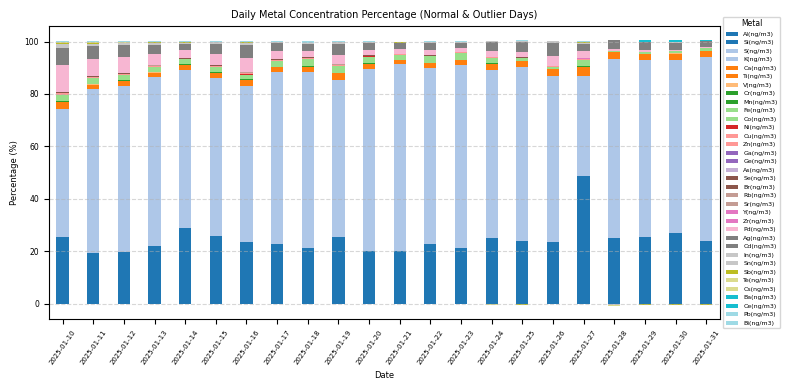

In [59]:
import matplotlib.pyplot as plt

# 그래프 생성
fig, ax = plt.subplots(figsize=(8, 4))

combined_percentage.plot(kind='bar',
                         stacked=True,
                         ax=ax,
                         width=0.4,
                         colormap='tab20')

# 그래프 기본 설정
plt.title("Daily Metal Concentration Percentage (Normal & Outlier Days)", fontsize=7)
plt.xlabel("Date", fontsize=6)
plt.ylabel("Percentage (%)", fontsize=6)
plt.xticks(rotation=55, fontsize=5.0)
plt.yticks(fontsize=5.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)


# 범례 설정
plt.legend(loc='center left',
           bbox_to_anchor=(1.0, 0.5),
           fontsize=4.5,
           title='Metal',
           title_fontsize=5.5)

# 레이아웃 자동 조절
plt.tight_layout()

# 결과 출력
plt.show()